## Read raw data from csv file

In [1]:
import numpy as np
import pandas as pd

valid_routes = ["2","6","8","9","10","12","13","16","20","23","27","34","36","39","40","43","46","51","52","52B","53","54","56","56A","59","60","61","62","63","65","69","70","75","78","82","85","87","88","89","91","92","93","94","95","96","98","102","104","110","111","112","115","122","126"]
stops = pd.read_csv("TMTStopsThroughRoutes(5).csv")
stops.head()

new = stops["route_num"].isin(valid_routes)
stops = stops[new].drop_duplicates()




## We need to take the following steps to get the data into a format that we can use for our analysis:
1. Find unique stop names-
  - remove exact duplicates.
2. Merge the duplicates into one stop name

### Compile all Bus Stops in Direction 0:

In [2]:
names_dir_0 = stops.loc[stops["route_direction"]==0, "name" ].str.lower().unique()
names_dir_0.sort()
print(names_dir_0)

['a k joshi' 'a.k. joshi vidyalaya' 'aai mata mandir'
 'aai mata mandir chowk' 'aalimghar' 'aashapura mndir' 'aban park'
 'abhiruchi' 'abhiruchi / castle mill' 'abhiruchi / holly cross school'
 'achole talav' 'agarwal estate' 'agriculture' 'air force station'
 'air force station kolshet' 'almos colony' 'amar palace' 'ambaji dham'
 'ambika nagar' 'ambika yog kutir' 'ambika yoga kutir' 'ambika yogkutir'
 'amrut angan' 'amrut nagar' 'anand nagar' 'anand nagar depot'
 'anand vihar' 'anjur' 'anjur phata' 'anunagar' 'aradhana cinema'
 'ashapura mandir' 'ashapura mandir / majiwada naka' 'ashok nagar'
 'asian cable' 'atriya society' 'automatic company' 'azad nagar'
 'azad nagar naka' 'babla compound / hanuman mandir' 'balkum naka'
 'balkum pada no 1' 'balkum pada no 2' 'balkum pada no 3' 'bapana bridge'
 'bappa sitaram' 'bara bunglow' 'batata company'
 'batata company / vijay garden' 'batata company / vijay garden / dmart'
 'bayer main gate' 'bethany hospital' 'bhaindar pada'
 'bhandup pumping

In [3]:
import folium
import random
import geopandas as gpd

map = folium.Map(location=[19.2, 72.9], tiles="OpenStreetMap", zoom_start=12)
    
i=0
p=0
stops_refined_dir_0 =[]
check_names = []
colors = ['gray', 'white', 'orange', 'pink', 'black', 'blue', 'darkgreen', 'darkred', 'darkpurple', 'lightblue', 'lightgray', 'green', 'lightred', 'darkblue', 'red', 'purple', 'beige', 'cadetblue', 'lightgreen']

for name in names_dir_0:
    stops_refined = stops.loc[stops["name"].str.lower()==name.lower(), ["name", "ref", "route_num", "route_direction", "longitude", "latitude", "position"]]
    stops_refined_1 = stops_refined.loc[stops_refined["route_direction"]==0, ["name", "ref", "route_num", "route_direction", "longitude", "latitude", "position"]]
    # print(stops_refined_1["properties/ref"])
    def range_of_coordinates(x):
        return max(x) - min(x)
    
    if (range_of_coordinates(stops_refined_1["latitude"])>0.002 or range_of_coordinates(stops_refined_1["longitude"])>0.002):
        # print(name, range_of_coordinates(stops_refined_1["latitude"]), range_of_coordinates(stops_refined_1["longitude"]))
        check_names.append(name)
        rand_color_1 = random.choice(colors)
        for j in range(len(stops_refined_1)):
            # print(stops_refined_1['properties/name'].iloc[0])
            folium.Marker([stops_refined_1['latitude'].iloc[j], stops_refined_1['longitude'].iloc[j]], popup=stops_refined_1['name'].iloc[j]+str(stops_refined_1['ref'].iloc[j]), icon=folium.Icon(color=rand_color_1)).add_to(map)
        p+=1
        
    else:
        avg_lat = stops_refined_1["latitude"].mean()
        avg_long = stops_refined_1["longitude"].mean()
        refs = ""
        for item in stops_refined_1["ref"].sort_values():
            refs += str(item) + ","

        route_nums = ""
        for item in stops_refined_1["route_num"].sort_values():
            route_nums += str(item) + ","
            
        name = stops_refined_1['name'].iloc[0]

        stops_refined_dir_0.append([name, refs, route_nums, avg_lat, avg_long])
    # stops_refined_2 = stops_refined_2.append(stops_refined_2, refs)
    i+=1
# print(stops_refined_dir_1)
stops_refined_dir_0 = pd.DataFrame(stops_refined_dir_0, columns=["name", "refs", "route_nums", "avg_lat", "avg_long"])
stops_direction_0_gdf = gpd.GeoDataFrame(stops_refined_dir_0, columns=["name", "refs", "route_nums"], geometry=gpd.points_from_xy(stops_refined_dir_0['avg_long'], stops_refined_dir_0['avg_lat']))  # type: ignore
stops_direction_0_gdf.to_file("stops_direction_0.geojson", driver='GeoJSON')

### Compile all Bus Stops in Direction 1:

In [4]:
names_dir_1 = stops.loc[stops["route_direction"]==1, "name" ].str.lower().unique()
names_dir_1.sort()
names_dir_1
print(stops.loc[stops["route_direction"]==1, "name" ])

65            Wagle Agar
66           Sathe Nagar
67       Passport Office
68             ITI Thane
69            Road No 27
              ...       
4111    Brahmand Phase 4
4112        Swastik Park
4113    Brahmand Phase 5
4114    Brahmand Phase 6
4115            Brahmand
Name: name, Length: 1388, dtype: object


## Check Directions


In [5]:
import folium
import random
import geopandas as gpd

map = folium.Map(location=[19.2, 72.9], tiles="OpenStreetMap", zoom_start=12)
    
i=0
p=0
stops_refined_dir_1 =[]
check_names = []
colors = ['gray', 'white', 'orange', 'pink', 'black', 'blue', 'darkgreen', 'darkred', 'darkpurple', 'lightblue', 'lightgray', 'green', 'lightred', 'darkblue', 'red', 'purple', 'beige', 'cadetblue', 'lightgreen']

for name in names_dir_1:
    stops_refined = stops.loc[stops["name"].str.lower()==name.lower(), ["name", "ref", "route_num", "route_direction", "longitude", "latitude", "position"]]
    stops_refined_1 = stops_refined.loc[stops_refined["route_direction"]==1, ["name", "ref", "route_num", "route_direction", "longitude", "latitude", "position"]]
    # print(stops_refined_1["properties/ref"])
    def range_of_coordinates(x):
        return max(x) - min(x)
    
    if (range_of_coordinates(stops_refined_1["latitude"])>0.002 or range_of_coordinates(stops_refined_1["longitude"])>0.002):
        # print(name, range_of_coordinates(stops_refined_1["latitude"]), range_of_coordinates(stops_refined_1["longitude"]))
        check_names.append(name)
        rand_color_1 = random.choice(colors)
        for j in range(len(stops_refined_1)):
            # print(stops_refined_1['properties/name'].iloc[0])
            folium.Marker([stops_refined_1['latitude'].iloc[j], stops_refined_1['longitude'].iloc[j]], popup=stops_refined_1['name'].iloc[j]+str(stops_refined_1['ref'].iloc[j]), icon=folium.Icon(color=rand_color_1)).add_to(map)
        p+=1
        
    else:
        avg_lat = stops_refined_1["latitude"].mean()
        avg_long = stops_refined_1["longitude"].mean()
        refs = ""
        for item in stops_refined_1["ref"].sort_values():
            refs += str(item) + ","

        route_nums = ""
        for item in stops_refined_1["route_num"].sort_values():
            route_nums += str(item) + ","
            
        name = stops_refined_1['name'].iloc[0]

        stops_refined_dir_1.append([name, refs, route_nums, avg_lat, avg_long])
    # stops_refined_2 = stops_refined_2.append(stops_refined_2, refs)
    i+=1
# print(stops_refined_dir_1)
stops_refined_dir_1 = pd.DataFrame(stops_refined_dir_1, columns=["name", "refs", "route_nums", "avg_lat", "avg_long"])
stops_direction_1_gdf = gpd.GeoDataFrame(stops_refined_dir_1, columns=["name", "refs", "route_nums"], geometry=gpd.points_from_xy(stops_refined_dir_1['avg_long'], stops_refined_dir_1['avg_lat']))  # type: ignore
stops_direction_1_gdf.to_file("stops_direction_1.geojson", driver='GeoJSON')

In [6]:
import folium
import random

map = folium.Map(location=[19.2, 72.9], tiles="OpenStreetMap", zoom_start=12)
colors = ['gray', 'white', 'orange', 'pink', 'black', 'blue', 'darkgreen', 'darkred', 'darkpurple', 'lightblue', 'lightgray', 'green', 'lightred', 'darkblue', 'red', 'purple', 'beige', 'cadetblue', 'lightgreen']

for i in range(len(valid_routes)):
    rand_color_1 = random.choice(colors)
    stop_for_valid_routes = stops.loc[stops["route_num"]==valid_routes[i], ["route_direction", "name", "ref", "route_num", "longitude", "latitude", "position"]]
    stop_for_valid_routes_1 = stop_for_valid_routes.loc[stop_for_valid_routes["route_direction"]==1, [ "name", "ref", "route_num", "longitude", "latitude", "position"]]
    stop_for_valid_routes_2 = stop_for_valid_routes_1.loc[stop_for_valid_routes_1["position"]==1, [ "name", "ref", "route_num", "longitude", "latitude"]]
    for j in range(len(stop_for_valid_routes_2['latitude'])):
        x=len(stop_for_valid_routes_1)-1
        folium.Marker([stop_for_valid_routes_2['latitude'].iloc[j], stop_for_valid_routes_2['longitude'].iloc[j]], popup=stop_for_valid_routes_2['route_num'].iloc[j]+str(stop_for_valid_routes_2['ref'].iloc[j]), icon=folium.Icon(color="green")).add_to(map)
        folium.Marker([stop_for_valid_routes_1['latitude'].iloc[x], stop_for_valid_routes_1['longitude'].iloc[x]], popup=stop_for_valid_routes_1['route_num'].iloc[x]+str(stop_for_valid_routes_1['ref'].iloc[x]), icon=folium.Icon(color="red")).add_to(map)
map


In [7]:
cross_routes = [91,43,36,78,82,126,75]

In [8]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
map = folium.Map(location=[19.2, 72.9], tiles="OpenStreetMap", zoom_start=12)
for i in range(0,len(stops_refined_dir_0)):
    folium.Marker([stops_refined_dir_0['avg_lat'][i], stops_refined_dir_0['avg_long'][i]], popup=stops_refined_dir_0['name'][i]+str(stops_refined_dir_0['route_nums'])).add_to(map)
    # HeatMap([[stops_refined_dir_0['avg_lat'][i], stops_refined_dir_0['avg_long'][i]]], radius=len(stops_refined_dir_0["route_nums"][i])).add_to(map)

map



In [9]:
import folium
from folium.plugins import HeatMap
map = folium.Map(location=[19.2, 72.9], tiles="OpenStreetMap", zoom_start=12)
for i in range(0,len(stops_refined_dir_1)):
    folium.Marker([stops_refined_dir_1['avg_lat'][i], stops_refined_dir_1['avg_long'][i]], popup=str(stops_refined_dir_1['route_nums'][i])).add_to(map)
    # HeatMap([[stops_refined_dir_0['avg_lat'][i], stops_refined_dir_0['avg_long'][i]]], radius=len(stops_refined_dir_0["route_nums"][i])).add_to(map)

map


In [10]:
from thefuzz import fuzz
s1 = "kokanipada"
s2 = "koknipada"
print(fuzz.ratio(s1, s2))


95


### Bus Stops in Route x Direction y

In [11]:
import folium
import random

map = folium.Map(location=[19.2, 72.9], tiles="OpenStreetMap", zoom_start=12)
colors = ['gray', 'white', 'orange', 'pink', 'black', 'blue', 'darkgreen', 'darkred', 'darkpurple', 'lightblue', 'lightgray', 'green', 'lightred', 'darkblue', 'red', 'purple', 'beige', 'cadetblue', 'lightgreen']

for i in range(len(stops_refined_dir_1)):
    if stops_refined_dir_1['route_nums'][i]==91:
        
        for i in range(0,len(stops_refined_dir_1)):
            folium.Marker([stops_refined_dir_1['avg_lat'].iloc[i], stops_refined_dir_1['avg_long'].iloc[i]], popup=stops_refined_dir_1['name'].iloc[i]).add_to(map)
        # HeatMap([[stops_refined_dir_0['avg_lat'][i], stops_refined_dir_0['avg_long'][i]]], radius=len(stops_refined_dir_0["route_nums"][i])).add_to(map)

map


In [12]:
osm_data = gpd.read_file("export(4).geojson")

In [13]:
osm_data.explore()
osm_data=osm_data.to_crs(3857)
stops_direction_1_gdf=stops_direction_1_gdf.set_crs(3857)

# stops_direction_1_gdf.to_crs(epsg=4326, inplace=True)



In [14]:
conflated_data = osm_data.sjoin_nearest(stops_direction_1_gdf)
conflated_data.drop(columns=['name_right'], inplace=True)
conflated_data.drop(columns=['@timestamp'], inplace=True)

conflated_data.head()


,id,@id,access,addr:city,addr:housenumber,addr:postcode,addr:street,alt_name,alt_name:hi,amenity,...,tactile_paving,wheelchair,@version,@changeset,@user,@uid,geometry,index_right,refs,route_nums
0,node/246449135,node/246449135,None,None,None,None,None,None,None,None,...,None,None,12,120841821,mvineetmenon,11353264,POINT (8118057.111 2160334.212),200,"1459,","88,"
1,node/246472067,node/246472067,None,None,None,None,None,None,None,None,...,None,None,8,127977249,mvineetmenon,11353264,POINT (8118863.175 2159901.791),200,"1459,","88,"
2,node/317914119,node/317914119,None,None,None,None,None,None,None,None,...,None,None,6,126705094,Monumental610,12430590,POINT (8123758.216 2177834.950),200,"1459,","88,"
3,node/321951464,node/321951464,None,None,None,None,None,None,None,None,...,None,None,11,81892173,Neena2309,4785024,POINT (8153227.435 2173080.534),200,"1459,","88,"
4,node/334531543,node/334531543,None,None,None,None,None,None,None,None,...,None,None,14,81891980,Neena2309,4785024,POINT (8152969.308 2174119.444),200,"1459,","88,"


In [15]:
route82 = pd.read_csv("82.csv")

route82['location.coordinates'] = route82['location.coordinates'].apply(lambda x: x.strip('[]'))
route82['location.coordinates.lon'] = route82['location.coordinates'].apply(lambda x: x.split(',')[0])
route82['location.coordinates.lat'] = route82['location.coordinates'].apply(lambda x: x.split(',')[1])
route82['PrevTrackDt'] = pd.to_datetime(route82['LastTrackdt'])
route82.set_index('PrevTrackDt', inplace=True)
route82gpd = gpd.GeoDataFrame(route82, geometry=gpd.points_from_xy(route82['location.coordinates.lon'], route82['location.coordinates.lat']))
route82gpd = route82gpd.set_crs(4326)


c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


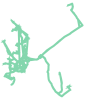

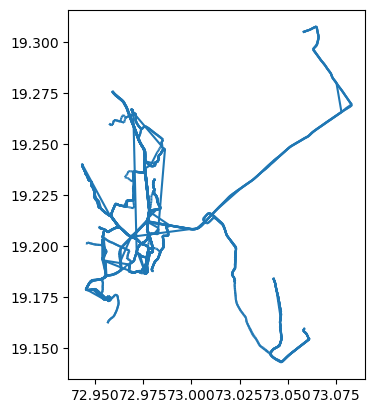

In [16]:
import movingpandas as mpd
my_traj = mpd.Trajectory(route82gpd, 'LastTrackdt', 'location.coordinates.lon', 'location.coordinates.lat')
my_traj.plot()
my_traj.to_linestring()

In [17]:
detector = mpd.TrajectoryStopDetector(my_traj)

In [18]:
from datetime import datetime, timedelta

split = mpd.SpeedSplitter(my_traj).split(speed=1, duration=timedelta(minutes=10))


c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [34]:
traj1=split.trajectories[6]
traj1.hvplot(geo=True, tiles='OSM', width=400, height=600, line_width=5, line_color='red', hover_cols=['LastTrackdt', 'location.coordinates.lon', 'location.coordinates.lat','RouteNo'])

c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]   (LastTrackdt,location.coordinates.lon,location.coordinates.lat,RouteNo)

In [35]:
traj1.add_speed(overwrite=True)
traj1.hvplot(c='speed', clim=(0,20), line_width=7.0, tiles='OSM', cmap='Viridis', colorbar=True)

c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
c:\Users\dusng\mambaforge\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]   (speed)